# image analysis
This notebook is used to easily test the image analysis manually

## Test using the actual module:

In [7]:
from image_analysis import analyze_image, SignalType, RecognizedNumber, AnalysisOutcome

outcome = analyze_image(None)
print(outcome.)

## Train the neural network:

In [9]:
# imports
import cv2
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [54]:
# where am I?
import os
print(os.getcwd())

C:\work\git\pren2\src\boardcomputer\image_analysis


In [10]:
# this makes the images a bit larger
mpl.rcParams['figure.dpi']= 267
plt.rcParams["figure.figsize"] = (40,30)

# plots directly in the notebook
%matplotlib inline 

# if you have a high-dpi monitor
%config InlineBackend.figure_format = 'retina' 

## Tests:

**convert image to gray**

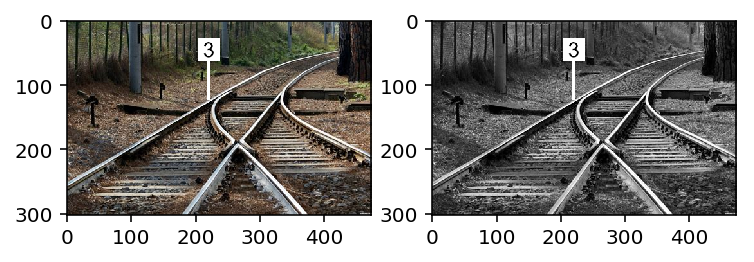

In [11]:
image_bgr = cv2.imread('tests/images/old_ocr_test.png')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(image_rgb)

plt.subplot(122)
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap="gray")
plt.show()

In [12]:
plt.imshow(image_gray, cmap="gray")

**find signal contours**

Image written to file-system :  True


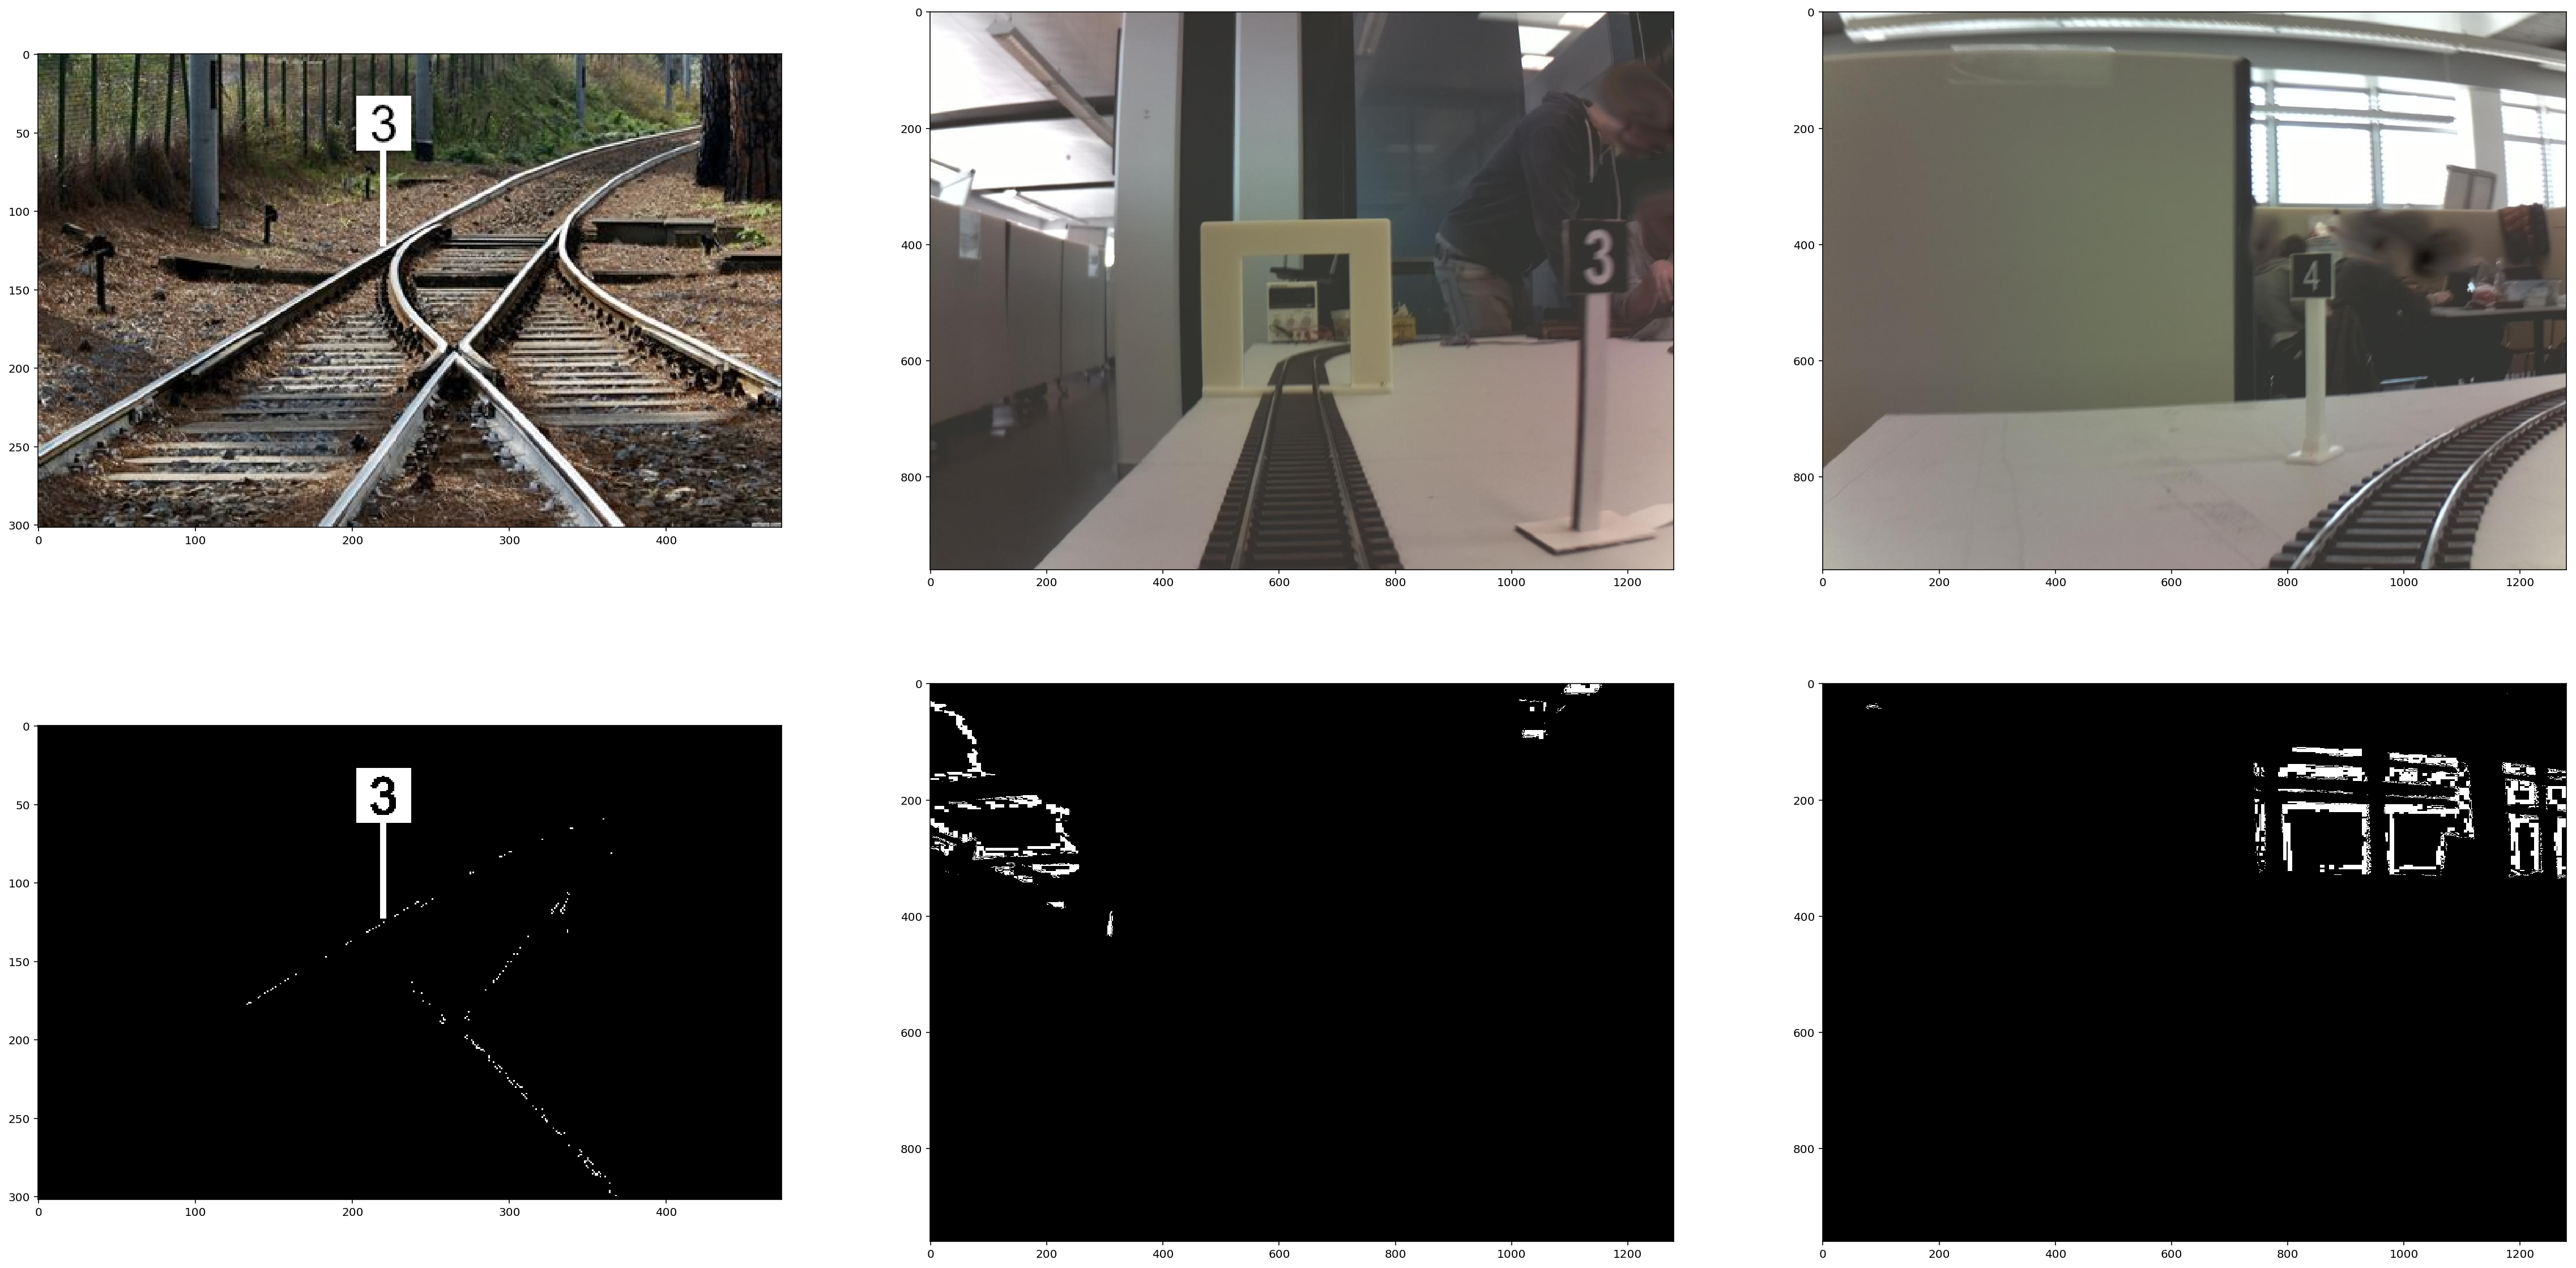

In [13]:
def get_contours_by_gray_value(img_bgr):
    image_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(image_gray,254,255,0)
    image_contours, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    return image_contours    

plt.rcParams["figure.figsize"] = (40,20)

image1 = cv2.imread('tests/images/old_ocr_test.png')
image2 = cv2.imread('tests/images/img25.jpg')
image3 = cv2.imread('tests/images/img9.jpg')

plt.subplot(231)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.subplot(232)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.subplot(233)
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))

plt.subplot(234)
plt.imshow(get_contours_by_gray_value(image1),cmap="gray")
plt.subplot(235)
plt.imshow(get_contours_by_gray_value(image2),cmap="gray")
plt.subplot(236)
plt.imshow(get_contours_by_gray_value(image3),cmap="gray")


image_gray = cv2.cvtColor(cv2.imread('tests/images/img9.jpg'), cv2.COLOR_BGR2GRAY)
status = cv2.imwrite('tests/images/img9_gray.jpg', image_gray)
print("Image written to file-system : ", status)

plt.show()

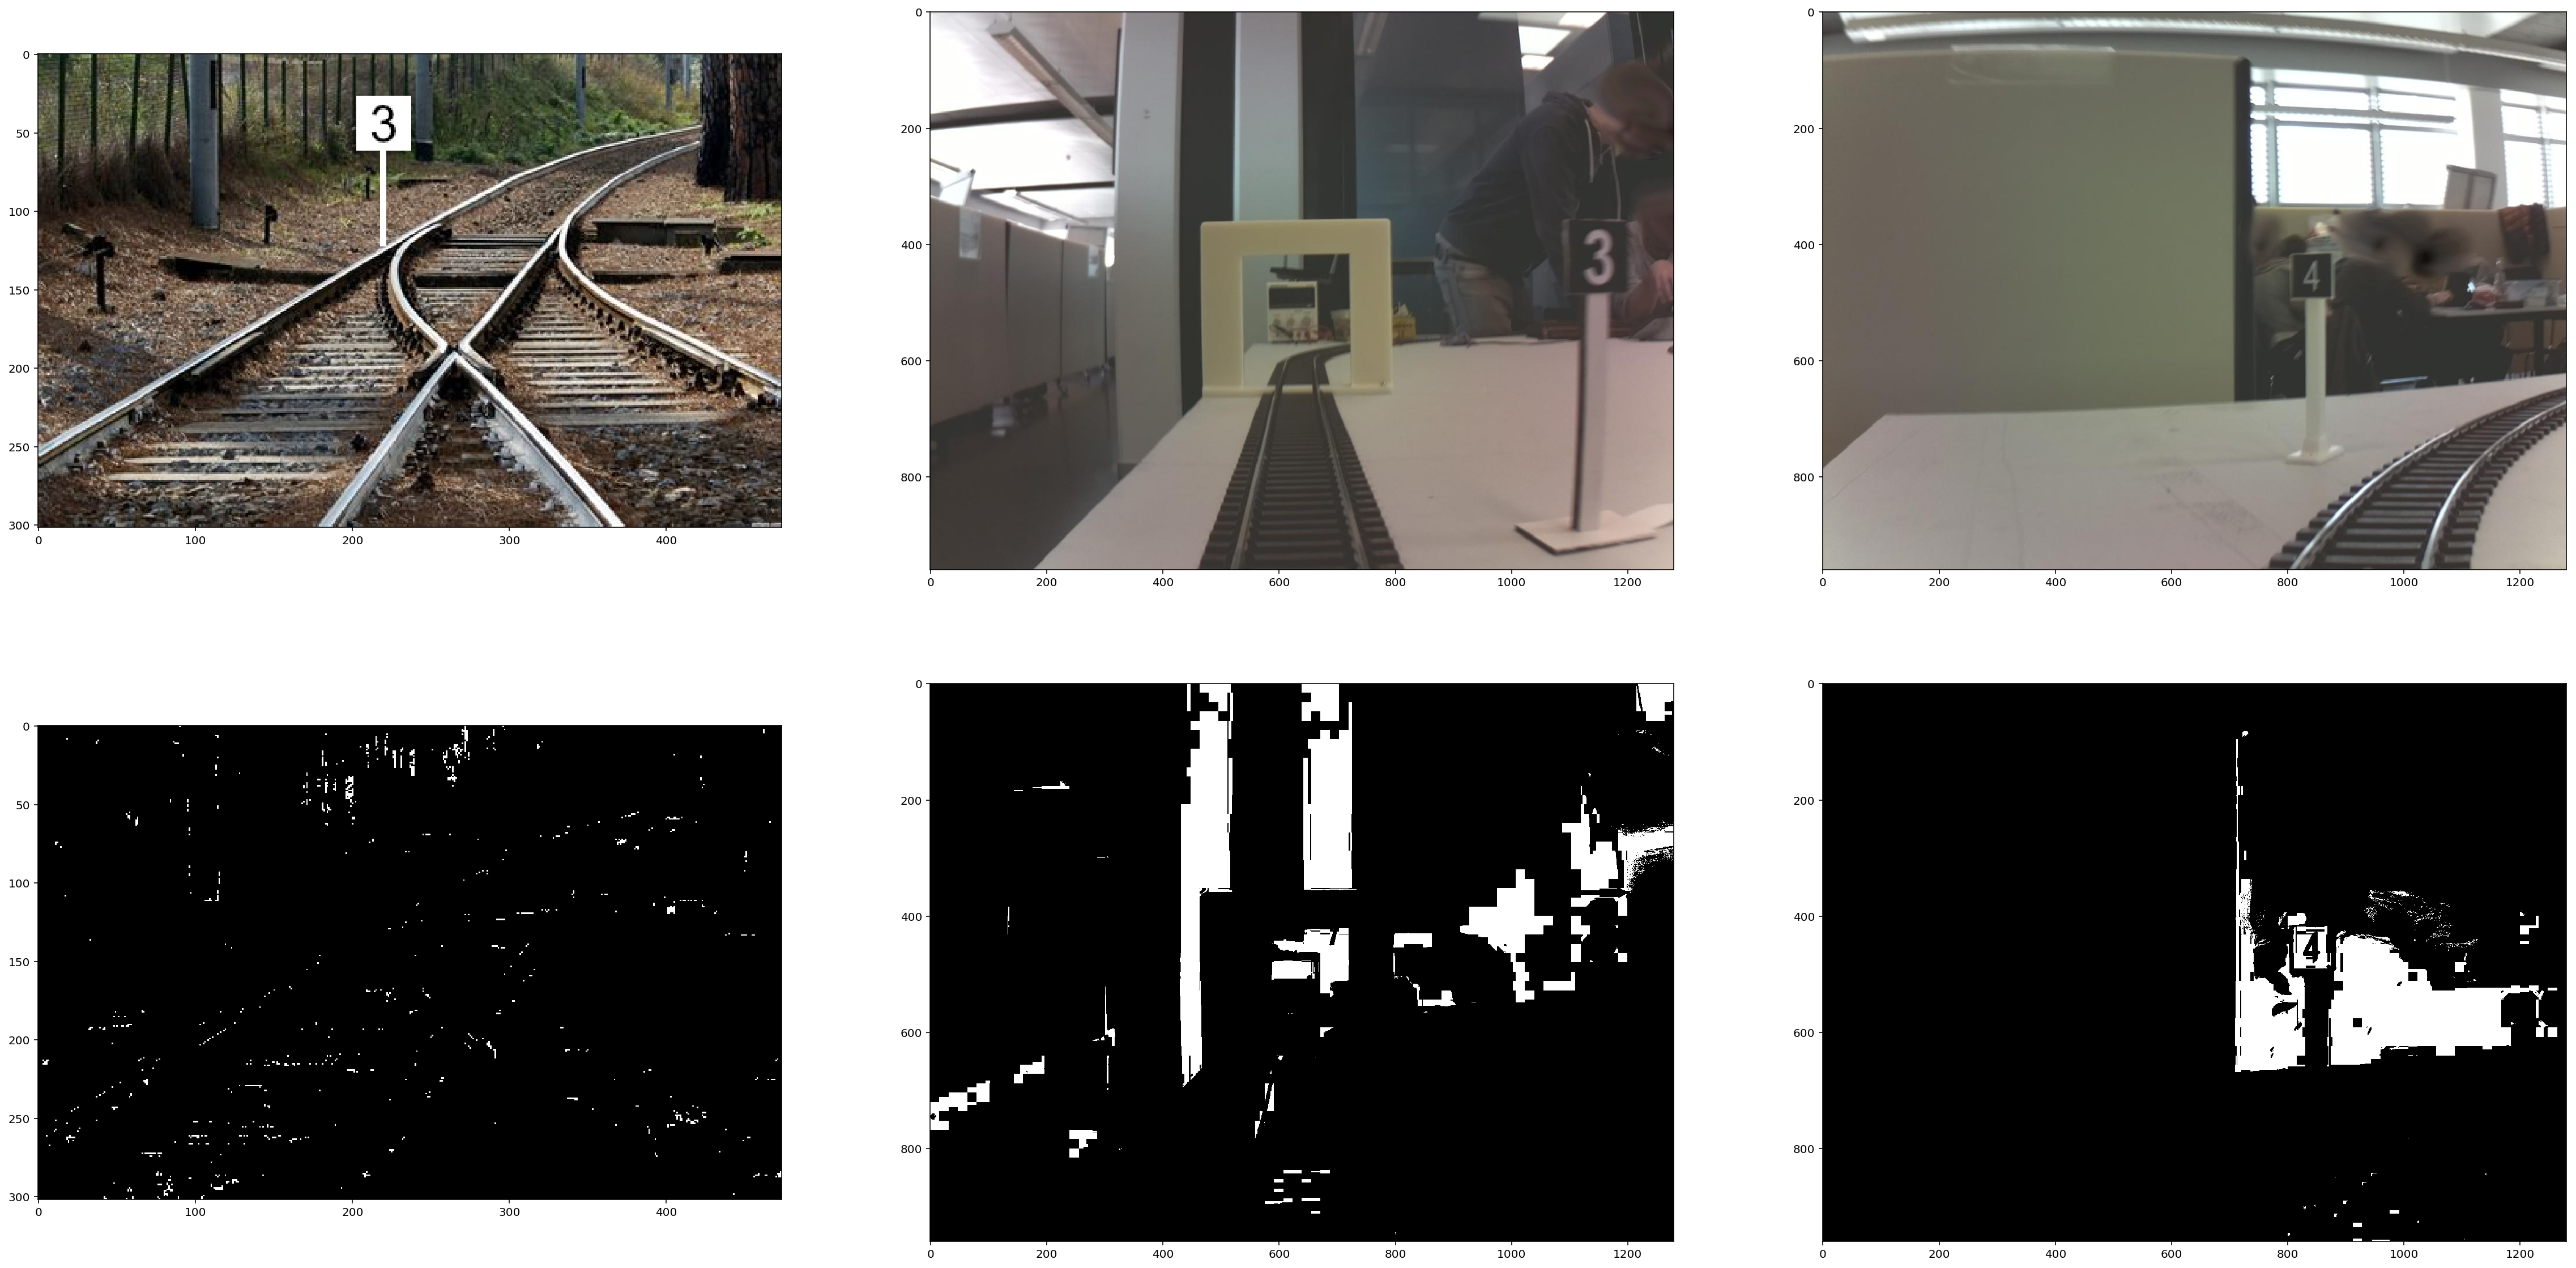

In [86]:
def get_contours_by_hsv_value(img_bgr):
    """
    find contours of black signals
    """
    # OpenCV uses different values for HSV! H: 0 - 180, S: 0 - 255, V: 0 - 255
    lower = np.array([24, 0, 40], dtype=np.uint8)    
    upper = np.array([50, 40, 65], dtype=np.uint8)
    image_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    image_threshed = cv2.inRange(image_hsv, lower, upper)
    return image_threshed

image1 = cv2.imread('tests/images/old_ocr_test.png')
image2 = cv2.imread('tests/images/img25.jpg')
image3 = cv2.imread('tests/images/img9.jpg')

plt.rcParams["figure.figsize"] = (40,20)

plt.subplot(231)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.subplot(232)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.subplot(233)
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))

plt.subplot(234)
plt.imshow(get_contours_by_hsv_value(image1), cmap="gray")
plt.subplot(235)
plt.imshow(get_contours_by_hsv_value(image2), cmap="gray")
plt.subplot(236)
plt.imshow(get_contours_by_hsv_value(image3), cmap="gray")

plt.show()

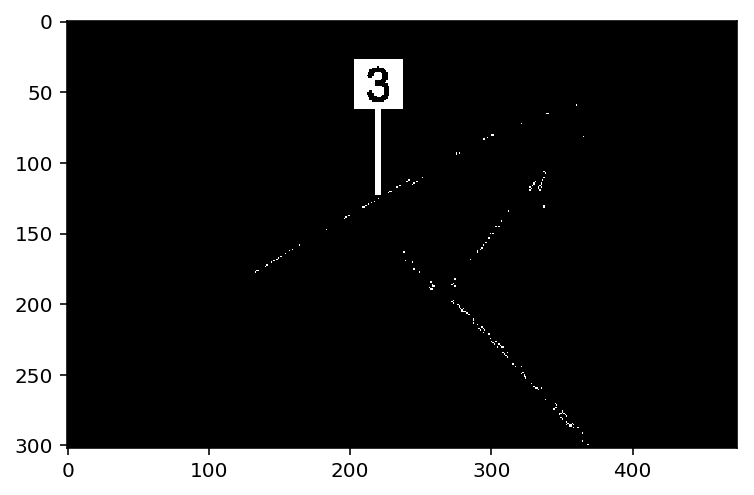

In [58]:
image_white = image_gray > 254
plt.imshow(image_white, cmap="gray")

In [35]:
# set all pixels that are closer to black to black and the ones closer to white to white.
picture_bgr = cv2.imread('tests/images/img25.jpg')
picture_gray = cv2.cvtColor(picture_bgr, cv2.COLOR_BGR2GRAY)
picture_rgb = cv2.cvtColor(picture_bgr, cv2.COLOR_BGR2RGB)

picture_rgb[picture_gray > 128] = [255, 255, 255]
picture_rgb[picture_gray <= 128] = [0, 0, 0]
plt.imshow(picture_rgb, cmap="gray")
# conclusion: this is not helpful because we can\'t distinguish the background from the signal.

In [52]:
# https://www.programcreek.com/python/example/70440/cv2.findContours
def __bound_contours(roi):
    """
        returns modified roi(non-destructive) and rectangles that founded by the algorithm.
        @roi region of interest to find contours
        @return (roi, rects, mask)
    """

    roi_copy = roi.copy()
    roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    
    # filter black color
    #mask1 = cv2.inRange(roi_hsv, np.array([0, 0, 0]), np.array([180, 255, 125]))
    
    # filter wnite color
    mask1 = cv2.inRange(roi_hsv, np.array([0, 0, 125]), np.array([180, 255, 255]))
    
    mask1 = cv2.morphologyEx(mask1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
    mask1 = cv2.Canny(mask1, 100, 300)
    mask1 = cv2.GaussianBlur(mask1, (1, 1), 0)
    mask1 = cv2.Canny(mask1, 100, 300)

    mask1 = cv2.morphologyEx(mask1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
    
    # Find contours for detected portion of the image
    im2, cnts, hierarchy = cv2.findContours(mask1.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10] # get largest ten contour area
    rects = []
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        x, y, w, h = cv2.boundingRect(approx)
        if h >= 15:
            # if height is enough
            # create rectangle for bounding
            rect = (x, y, w, h)
            rects.append(rect)
            cv2.rectangle(roi_copy, (x, y), (x+w, y+h), (100, 255, 0), 2);

    return (roi_copy, rects, mask1)

In [53]:
image2 = cv2.imread('tests/images/img25.jpg')
image3 = cv2.imread('tests/images/img9.jpg')

roi, rects, mask = __bound_contours(image2)
plt.subplot(221)
plt.imshow(roi)
plt.subplot(223)
plt.imshow(mask, cmap='gray')

roi, rects, mask = __bound_contours(image3)
plt.subplot(222)
plt.imshow(roi)
plt.subplot(224)
plt.imshow(mask, cmap='gray')

plt.show()git add